In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [91]:
df = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/Mall_Customers (1).csv')

In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
df.shape

(200, 5)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [95]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [96]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [97]:
df.duplicated().sum()

np.int64(0)

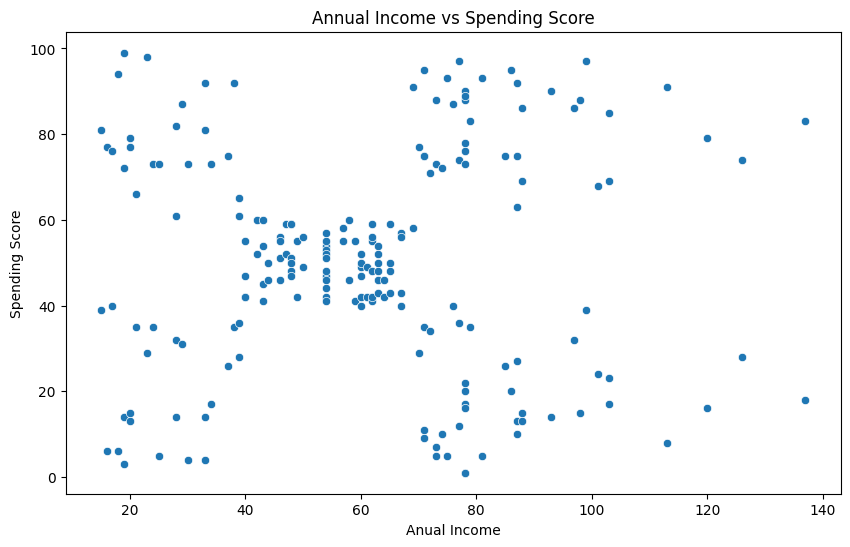

In [98]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], data = df, marker = 'o')
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.show()

In [99]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [100]:
sse = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    sse.append(km.inertia_)

In [101]:
sse

[269981.28,
 181363.595959596,
 106348.37306211118,
 73880.64496247197,
 44454.47647967974,
 37271.8862365895,
 31609.7770499849,
 25062.43379265378,
 23271.00160802555,
 21751.443276188016]

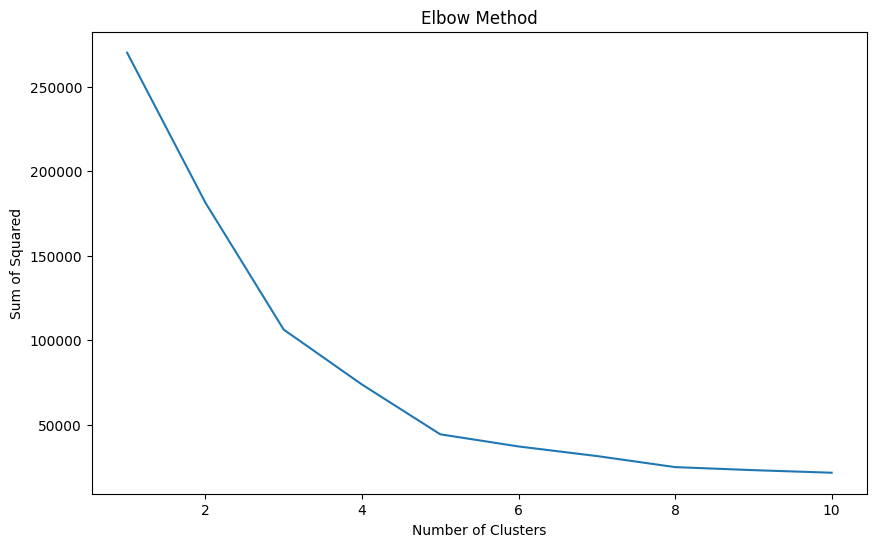

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared')
plt.title('Elbow Method')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [104]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [106]:
pred = kmeans.predict(X)

Text(0.5, 1.0, 'Clusters of Annual Income vs Spending Score')

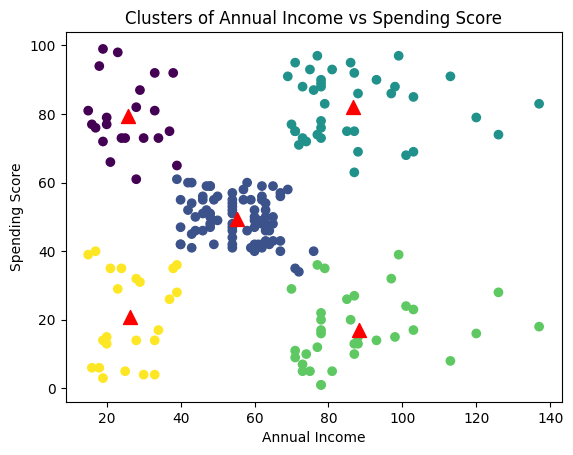

In [113]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = pred, cmap = 'viridis', marker = 'o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', marker='^')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Annual Income vs Spending Score')

In [115]:
print("Inertia: ", kmeans.inertia_)
print("Silhouette Score: ", silhouette_score(X, pred))

Inertia:  44448.45544793371
Silhouette Score:  0.553931997444648


In [120]:
new_point = [[60, 50]]
new_point_pred = kmeans.predict(new_point)
print(new_point_pred)

[1]


Text(0.5, 1.0, 'Clusters of Annual Income vs Spending Score')

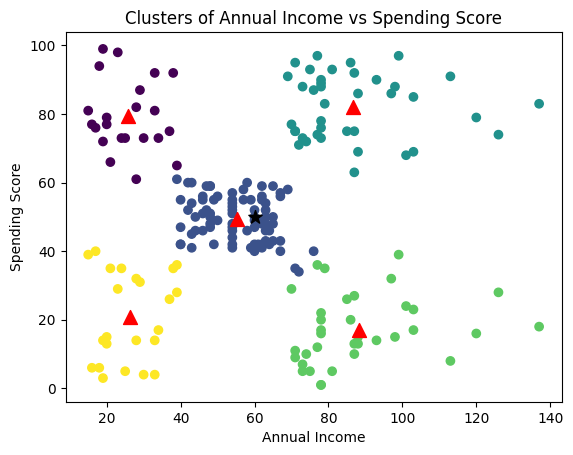

In [121]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = pred, cmap = 'viridis', marker = 'o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', marker='^', label = 'Centroids')
plt.scatter(new_point[0][0], new_point[0][1], s = 100, c = 'black', marker='*', label = 'New Point')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Annual Income vs Spending Score')